In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### All the common words taken and Dataframe made 

In [2]:
df = pd.read_csv("emails.csv")
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [3]:
df['Email No.'] = df['Email No.'].str.replace('Email', '')
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [4]:
X = df.drop("Prediction",axis=1)
y = df["Prediction"]

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=(1/3), random_state=42)
for train_index, test_index in split.split(X.to_numpy(), y.to_numpy()):
    X_train, X_test = X.to_numpy()[train_index], X.to_numpy()[test_index]
    y_train, y_test = y.to_numpy()[train_index], y.to_numpy()[test_index]

In [6]:
C = 5
alpha = 1 / (C * len(X))

# SVC

In [7]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("svc",SVC(C=C))
])
svm_clf.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=5))])

In [8]:
y_pred = svm_clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

f"{accuracy_score(y_test,y_pred)*100}%"

'94.89559164733178%'

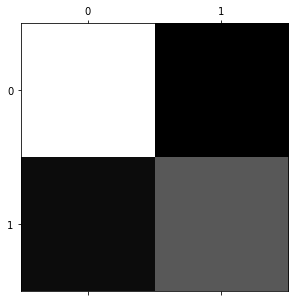

In [10]:
conf_mx = confusion_matrix(y_test,y_pred)
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [11]:
conf_mx

array([[1209,   15],
       [  73,  427]], dtype=int64)

# LinearSVC

In [12]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=C, loss='hinge',random_state=42))
])

svm_clf.fit(X_train,y_train)

C:\Users\vacha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=5, loss='hinge', random_state=42))])

In [13]:
y_pred = svm_clf.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [14]:
f"{accuracy_score(y_test,y_pred)*100}%"

'92.11136890951276%'

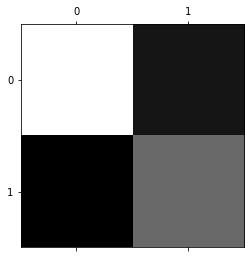

In [15]:
conf_mx = confusion_matrix(y_test,y_pred)
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [16]:
conf_mx

array([[1111,  113],
       [  23,  477]], dtype=int64)

# SGDClassifier

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("sgd_clsf",SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42))
])
sgd_clf.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd_clsf',
                 SGDClassifier(alpha=3.8669760247486464e-05, eta0=0.001,
                               learning_rate='constant', random_state=42))])

In [18]:
y_pred = sgd_clf.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
f"{accuracy_score(y_test,y_pred)*100}%"

'96.75174013921114%'

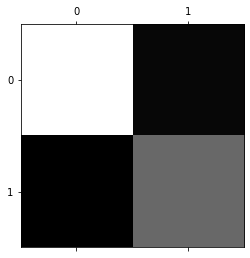

In [20]:
conf_mx = confusion_matrix(y_test,y_pred)
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [21]:
conf_mx

array([[1180,   44],
       [  12,  488]], dtype=int64)